# CS 457 - Homework Assignment  13: NLP
## Name: Owais Waheed (ow07611)
### Email: ow07611@st.habib.edu.pk




In [1]:
# ! pip install SpaCy
# ! python -m spacy download en

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owais\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Question 1

In [23]:

def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))
    
nlp = en_core_web_sm.load()
ny_bb = url_to_string('https://www.dawn.com/news/1794869/amidst-israeli-bombardment-gaza-journalists-share-heart-breaking-goodbyes')
article = nlp(ny_bb)
print("There are",len(article.ents), "entities in the article")

There are 172 entities in the article


In [3]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'NORP': 13,
         'GPE': 50,
         'DATE': 31,
         'TIME': 2,
         'PRODUCT': 4,
         'PERSON': 24,
         'ORG': 21,
         'CARDINAL': 16,
         'ORDINAL': 1,
         'FAC': 2,
         'LANGUAGE': 1,
         'WORK_OF_ART': 1,
         'LOC': 1})

#### The above output shows the variety of entities in the selected blog/article. There are about 50 geopolitical locations, 31 dates, 24 person and so on.

In [4]:
items = [x.text for x in article.ents]
Counter(items).most_common(5)

[('Gaza', 19), ('2023', 8), ('Pakistan', 8), ('Israeli', 7), ('one', 3)]

#### The most common words include Gaza , 2023, Israeli because the article was about the current war going on in Gaza published in a Pakistani news paper Dawn.

In [5]:
sentences = [x for x in article.sents]
print(len(sentences))
print(sentences[0])

70
 Amidst Israeli bombardment, Gaza journalists share heart-breaking ‘goodbyes’ - World - DAWN.COM   EPAPER LIVE TV DAWNNEWS URDU Images Herald Aurora CityFM89


#### This is the first sentence/heading of the article

In [6]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')

#### The above output highlights the name entity in  the first sentence of the Article where Gaza is a country and Israeli is nationality group.

In [7]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])

{'Israeli': 'NORP', 'Gaza': 'GPE'}

In [8]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[0])) if not y.is_stop and y.pos_ != 'PUNCT']]

[(' ', 'SPACE', ' '),
 ('Amidst', 'ADP', 'amidst'),
 ('Israeli', 'ADJ', 'israeli'),
 ('bombardment', 'NOUN', 'bombardment'),
 ('Gaza', 'PROPN', 'Gaza'),
 ('journalists', 'NOUN', 'journalist'),
 ('share', 'VERB', 'share'),
 ('heart', 'NOUN', 'heart'),
 ('breaking', 'VERB', 'break'),
 ('goodbyes', 'NOUN', 'goodbyes'),
 ('World', 'PROPN', 'World'),
 ('DAWN.COM', 'PROPN', 'DAWN.COM'),
 ('  ', 'SPACE', '  '),
 ('EPAPER', 'PROPN', 'EPAPER'),
 ('LIVE', 'ADJ', 'live'),
 ('TV', 'NOUN', 'tv'),
 ('DAWNNEWS', 'NOUN', 'dawnnews'),
 ('URDU', 'NOUN', 'urdu'),
 ('Images', 'PROPN', 'Images'),
 ('Herald', 'PROPN', 'Herald'),
 ('Aurora', 'PROPN', 'Aurora'),
 ('CityFM89', 'PROPN', 'CityFM89')]

#### The above output highlights the nature of every word used in the first sentence of article. And it has correctly classified every word as noun, verb, adjective and so on.

In [9]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

## Analysis
#### The above techniques I used helped me to identify the entities and stakeholders that were mentioned in my article. The algorithm has done a pretty good job in highlighting most of the entities in the article. Moreover it also classifies those on the based of their nature like location, person names, dates, etc. 
#### Another interesting about the algorithm is that it was working correctly on the Urdu language as well which I was not expecting. It has highlited the entities in the urdu sentences used in article but it has missed so many enteries in Urdu like person names etc.

# Question 2

In [10]:
 # ! pip install tika
from tika import parser

raw = parser.from_file('Hw13_article.pdf')
text = raw['content']


2023-12-05 14:57:28,155 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [11]:
token_words = nltk.tokenize.word_tokenize(text)
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "Q", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t.", "s"])
no_stopwords = [word for word in token_words if word.lower() not in stopwords]
nonPunct = re.compile('.*[A-Za-z].*')
cleaned = [w for w in no_stopwords if nonPunct.match(w)]
filteredwordfreq = nltk.FreqDist(cleaned)
filteredwordfreq.most_common(10)

[('students', 82),
 ('anxiety', 51),
 ('depression', 45),
 ('stress', 45),
 ('among', 43),
 ('_GoBack', 30),
 ('university', 27),
 ('medical', 26),
 ('study', 25),
 ('level', 24)]

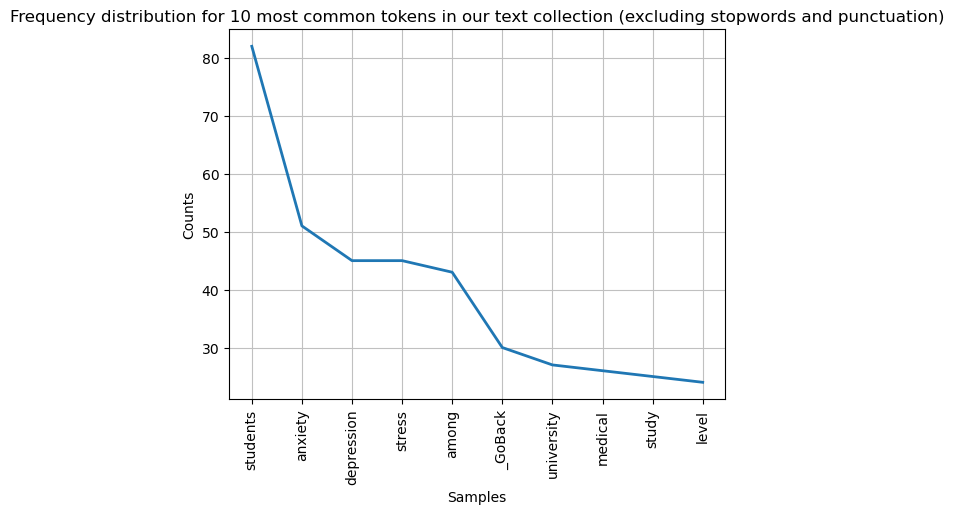

<Axes: title={'center': 'Frequency distribution for 10 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [12]:
filteredwordfreq.plot(10, title="Frequency distribution for 10 most common tokens in our text collection (excluding stopwords and punctuation)")

#### The above output and visualization shows the 10 most common words in my pdf research article. Since the article is aboout the stress levels in under grads, the most used words included students, anxiety, depression, stress, etc

In [13]:
# ! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

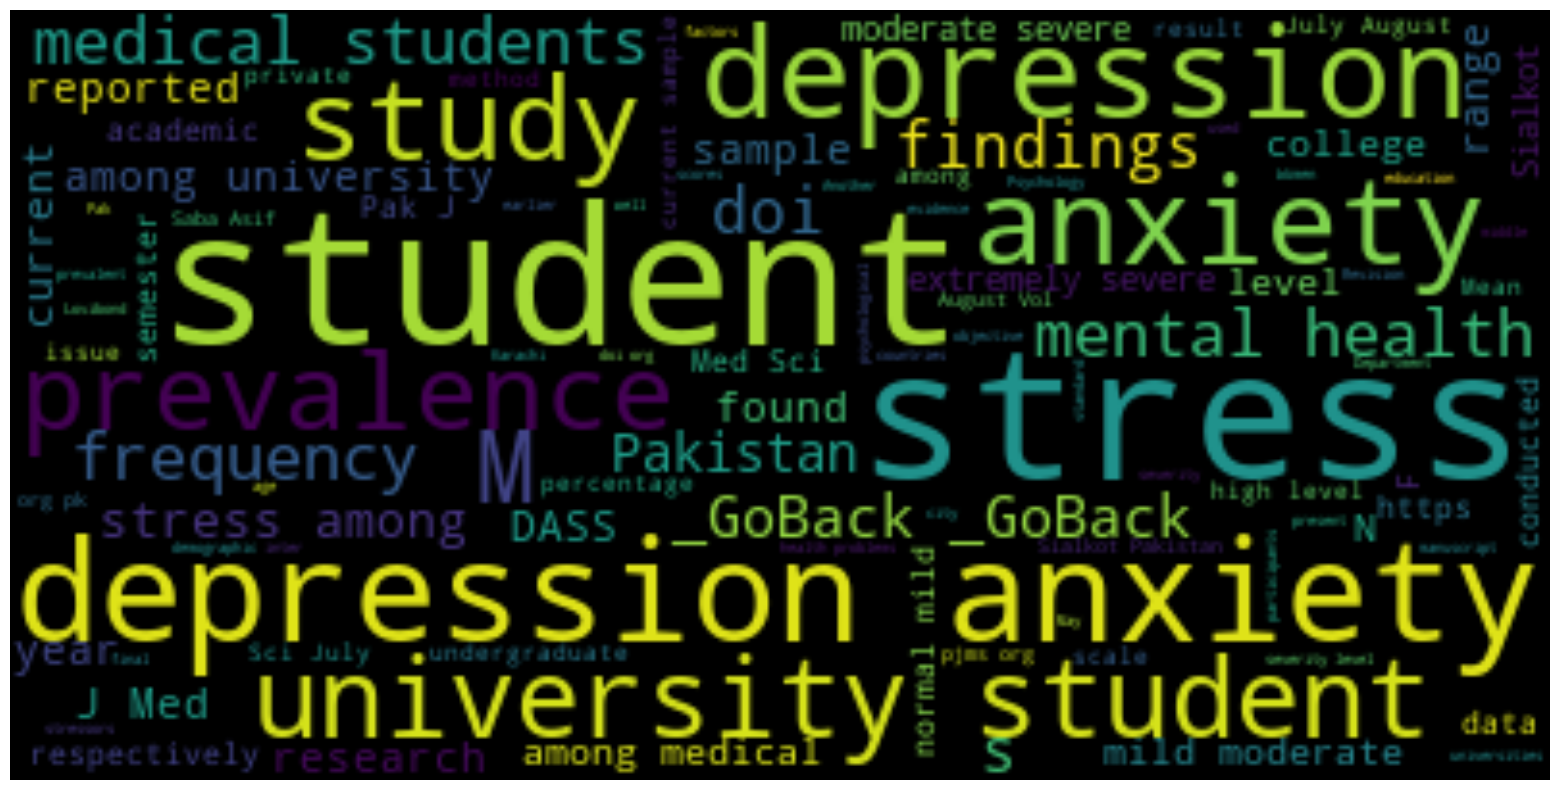

In [14]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### The above visualisation contains wordcloud of the article. It shows the 100 most commonly used words in my article. The display size of the words is directly proportional to their frequency in the article 

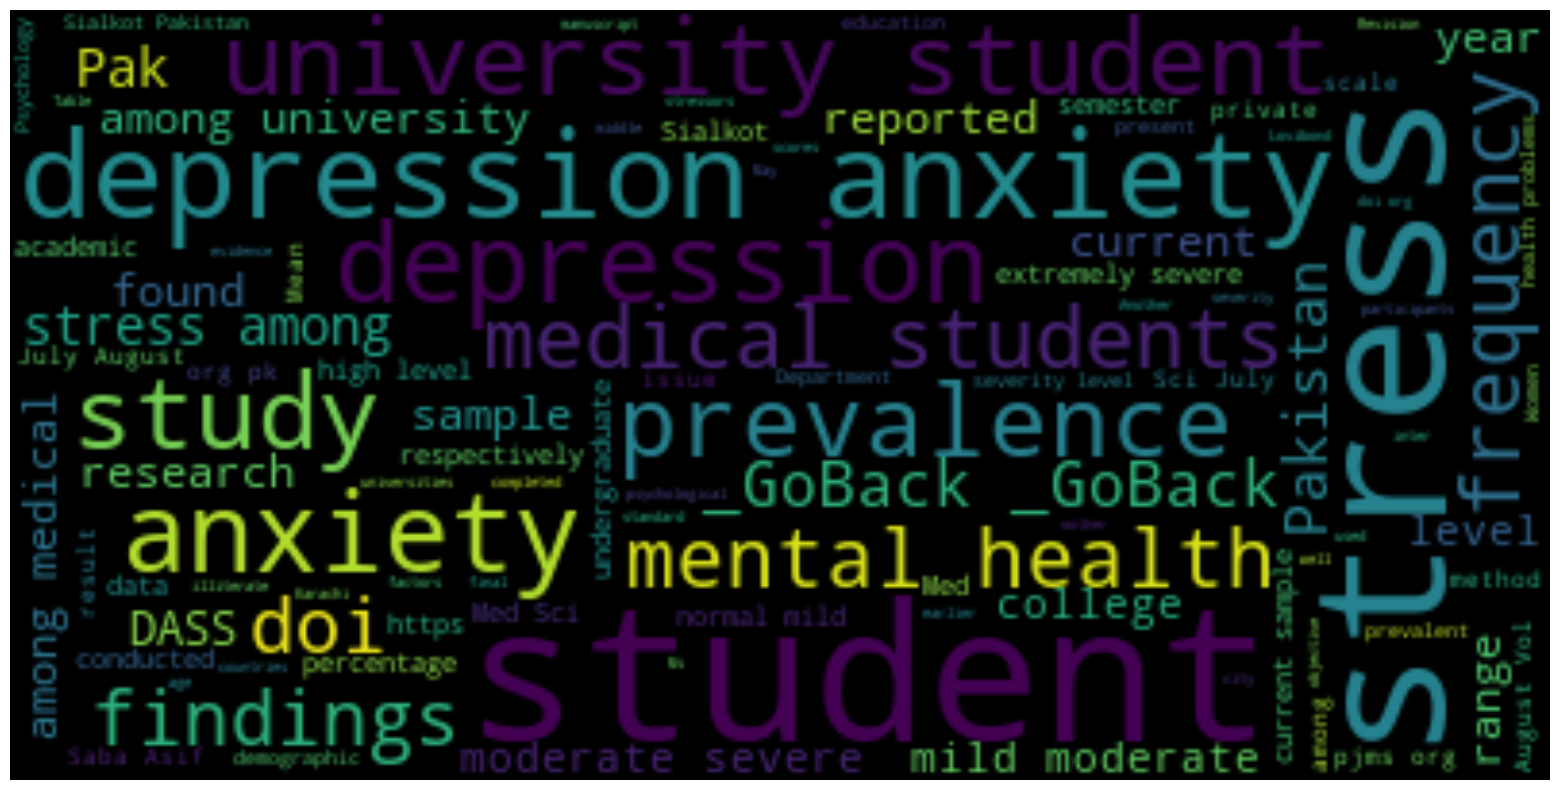

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "F", "N", "al", "Q", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t.", "s"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### The above wordcloud was generated after removing the stopwords and punctuations.

In [16]:
# !pip install yake
# ! pip install rake_nltk
from rake_nltk import Rake
import yake
r = Rake()
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()[:10]

[(22103.666666666664,
  '1670402 _hlk24829279 _hlk24903175 _hlk21200474 _goback _goback _goback ft6 _hlk38843004 _hlk38567019 _hlk38055234 _hlk38062783 _hlk38505284 _hlk38841052 _hlk38286189 ole_link7 ole_link8 _goback ole_link1 ole_link2 ole_link5 ole_link4 ole_link17 _hlk28936434 _hlk27471166 _hlk27493721 _hlk27491112 ole_link7 ole_link8 ole_link6 _hlk27407173 ole_link9 ole_link10 ole_link13 ole_link14 ole_link18 _hlk28956414 _hlk27495171 ole_link20 ole_link19 _goback ole_link2 ole_link1 _goback _goback page11 _goback _enref_1 _enref_2 _enref_4 _enref_5 _enref_7 _enref_10 _enref_9 _enref_6 _enref_13 _enref_15 _enref_17 _hlk22967395 _hlk522174504 _goback _hlk39308906 _goback _goback _goback _enref_1 _enref_2 _enref_3 _enref_4 _enref_5 _enref_6 _enref_1 _enref_2 _enref_3 _enref_4 _enref_5 _enref_6 _enref_7 _enref_8 _enref_9 _enref_10 _enref_11 _enref_12 _enref_13 _enref_14 _enref_15 _enref_16 _enref_17 _enref_18 _enref_19 _enref_20 _enref_21 _enref_22 _enref_23 _enref_24 _enref_25 _enr

#### The above output shows the keyphrases from the text. The relevancy scores according to the context of words are also given.

In [17]:

kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('ENREF', 0.001792283849339932)
('Students', 0.0023464063681466647)
('university students', 0.0024244425781251556)
('Depression', 0.002733203952479993)
('anxiety', 0.003112745470712791)
('stress', 0.003329103382482615)
('medical students', 0.0035331568163586282)
('mental health', 0.00714546596660687)
('OLE', 0.008323497484174859)
('University', 0.008325852525661395)
('GoBack', 0.011519750559580376)
('prevalence', 0.011814774372994273)
('Pakistan', 0.011970640719607564)
('medical', 0.012402058643753008)
('health', 0.012890332992681525)
('level', 0.014189808803917585)
('Med Sci', 0.014978257463436017)
('INTRODUCTION Students', 0.015012347952930256)
('Sialkot', 0.015106292517849562)
('study', 0.015855408604483995)


#### The output above shows the most common words along with their score of importance in the chosen paper.

## Analysis

#### The topic of my paper is about stress levels in the under grad college students. It talks about how severly students are getting into depression due to academics induced anxiety and stress. A method employing frequency graphs was implemented to chart the most frequently occurring words in the document, which showed that students, depression and anxiety were ranked amongst the top words, showing their relevancy to the article.

#### One limitation of the given algorithm was the treatment of words with similar meanings as separate entities. Sometimes words with starting capital letters were also treated as different entities. The word cloud technique was employed for the visualization of key terms from the document, yielding effective outcomes. For the task of automated keyword extraction, both Rake and Yake libraries were utilized. The output of Yake seemed more significant than that of Rake.

# Question 3

In [25]:
# part A

# Search term "Ind vs Aus Worldcup"

ttext = open('Tweets.txt','r')
corpus = ttext.read()
print(corpus)

Indians are sore losers.
This Win Will Help Us Heal From The World Cup Well played India and Hope we won the T20 WC Next Year under Ro-Hit Man Sharma's leadership.
Dedicated to the guy that screwed Tilak varma and K L Rahul's records
India is dreaming about World Cup alwys and itz not a bad to dream!!
Australian Cricketers Face Fatigue with T20 Challenge in India
Seems like, Google is still in the World Cup mood. Come on man! wake up to reality 
Who is Mohammad Kaif taking a dig at here?
Prasidh Krishna straight up garbage. 
Get Bishnoi, Kuldeep, Ashwin, Shami and Bumrah in top 11 in the T20 World Cup 24. 
Well Done Team India. Well deserved victory! 


In [26]:
#part B
# ! pip install textblob 
from textblob import TextBlob
corpus = corpus.splitlines()

positive = 0
negative = 0
nuetral = 0

for line in corpus:
    analysis = TextBlob(line)
    print(line, analysis.sentiment)
    if analysis.sentiment.polarity > 0:
        positive = positive + 1
    elif analysis.sentiment.polarity < 0:
        negative = negative + 1
    else:
        nuetral = nuetral + 1

print("Positive Tweets: ", positive)
print("Negative Tweets: ", negative)
print("Neutral Tweets: ", nuetral)



Indians are sore losers. Sentiment(polarity=-0.2, subjectivity=0.2)
This Win Will Help Us Heal From The World Cup Well played India and Hope we won the T20 WC Next Year under Ro-Hit Man Sharma's leadership. Sentiment(polarity=0.4, subjectivity=0.2)
Dedicated to the guy that screwed Tilak varma and K L Rahul's records Sentiment(polarity=0.0, subjectivity=0.0)
India is dreaming about World Cup alwys and itz not a bad to dream!! Sentiment(polarity=0.5, subjectivity=0.6666666666666666)
Australian Cricketers Face Fatigue with T20 Challenge in India Sentiment(polarity=0.0, subjectivity=0.0)
Seems like, Google is still in the World Cup mood. Come on man! wake up to reality  Sentiment(polarity=0.0, subjectivity=0.0)
Who is Mohammad Kaif taking a dig at here? Sentiment(polarity=0.0, subjectivity=0.0)
Prasidh Krishna straight up garbage.  Sentiment(polarity=0.2, subjectivity=0.4)
Get Bishnoi, Kuldeep, Ashwin, Shami and Bumrah in top 11 in the T20 World Cup 24.  Sentiment(polarity=0.5, subjectivi

#### The algorithm worked pretty fine in finding out the positive and negative sentiments about the tweets. However I have noticed that the model gives positive polarity to a tweet which labeled a player as garbage maybe because the model has been trained on the adjectives like good bad and so on. Moreover the model is also unable to see sarcasm as a negative sentiment as it should be for example in the line 3 the tweet was dedicated for a guy who ruined other players performance and the model labelled it as neutral

In [20]:
#part C

from textblob import TextBlob

high = 0
low = 0
highesttweet = ""
lowesttweet = ""

for line in corpus:
    analysis = TextBlob(line)
    if analysis.sentiment.polarity >= 0:
        if analysis.sentiment.polarity > high:
            high = analysis.sentiment.polarity
            highesttweet = line
    elif analysis.sentiment.polarity < 0:
        if analysis.sentiment.polarity < low:
            low = analysis.sentiment.polarity
            lowesttweet = line

print("Lowest polarity: ", low)
print("The tweet: ", lowesttweet)
print("Highest polarity: ", high)
print("The tweet: ", highesttweet)


Lowest polarity:  -0.2
The tweet:  Indians are sore losers.
Highest polarity:  0.5
The tweet:  India is dreaming about World Cup alwys and itz not a bad to dream!!


#### It worked well in highlighting the most negative and positive tweet. The positive tweet is about hope of winning which is a positive sentiment indeed. The same goes for negative tweet which labeled an entire group of people as losers.